In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from itertools import combinations
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
df_beer = pd.read_csv("beers.csv")
df_brew = pd.read_csv("breweries.csv")

In [3]:
df_beer

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [4]:
df_brew

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
5,5,COAST Brewing Company,Charleston,SC
6,6,Great Divide Brewing Company,Denver,CO
7,7,Tapistry Brewing,Bridgman,MI
8,8,Big Lake Brewing,Holland,MI
9,9,The Mitten Brewing Company,Grand Rapids,MI


In [5]:
df_brew['brewery_id'] = df_brew.index

df_brew

,Unnamed: 0,name,city,state,brewery_id
0,0,NorthGate Brewing,Minneapolis,MN,0
1,1,Against the Grain Brewery,Louisville,KY,1
2,2,Jack's Abby Craft Lagers,Framingham,MA,2
3,3,Mike Hess Brewing Company,San Diego,CA,3
4,4,Fort Point Beer Company,San Francisco,CA,4
5,5,COAST Brewing Company,Charleston,SC,5
6,6,Great Divide Brewing Company,Denver,CO,6
7,7,Tapistry Brewing,Bridgman,MI,7
8,8,Big Lake Brewing,Holland,MI,8
9,9,The Mitten Brewing Company,Grand Rapids,MI,9


In [6]:
df = df_beer.merge(df_brew, on="brewery_id")#print(df.head())


In [7]:
df

,Unnamed: 0_x,abv,ibu,id,name_x,style,brewery_id,ounces,Unnamed: 0_y,name_y,city,state
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,408,10 Barrel Brewing Company,Bend,OR
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,177,18th Street Brewery,Gary,IN
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,177,18th Street Brewery,Gary,IN
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,177,18th Street Brewery,Gary,IN
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,177,18th Street Brewery,Gary,IN
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,177,18th Street Brewery,Gary,IN
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0,177,18th Street Brewery,Gary,IN
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0,177,18th Street Brewery,Gary,IN
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0,177,18th Street Brewery,Gary,IN
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0,177,18th Street Brewery,Gary,IN


In [8]:
del df['Unnamed: 0_x']

In [9]:
del df['id']

In [10]:
del df['Unnamed: 0_y']

In [11]:
del df['brewery_id']

In [12]:
df['beer'] = df['name_x']

In [13]:
del df['name_x']

In [14]:
df['brewer'] = df['name_y']
del df['name_y']

In [15]:
df

,abv,ibu,style,ounces,city,state,beer,brewer
0,0.050,NaN,American Pale Lager,12.0,Bend,OR,Pub Beer,10 Barrel Brewing Company
1,0.066,NaN,American Pale Ale (APA),12.0,Gary,IN,Devil's Cup,18th Street Brewery
2,0.071,NaN,American IPA,12.0,Gary,IN,Rise of the Phoenix,18th Street Brewery
3,0.090,NaN,American Double / Imperial IPA,12.0,Gary,IN,Sinister,18th Street Brewery
4,0.075,NaN,American IPA,12.0,Gary,IN,Sex and Candy,18th Street Brewery
5,0.077,NaN,Oatmeal Stout,12.0,Gary,IN,Black Exodus,18th Street Brewery
6,0.045,NaN,American Pale Ale (APA),12.0,Gary,IN,Lake Street Express,18th Street Brewery
7,0.065,NaN,American Porter,12.0,Gary,IN,Foreman,18th Street Brewery
8,0.055,NaN,American Pale Ale (APA),12.0,Gary,IN,Jade,18th Street Brewery
9,0.086,NaN,American Double / Imperial IPA,12.0,Gary,IN,Cone Crusher,18th Street Brewery


(3.5, -0.5)

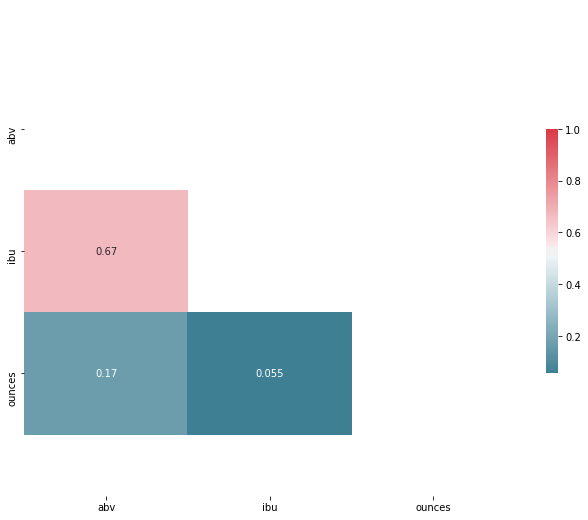

In [16]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr,annot= True, mask=mask, cmap=cmap,cbar_kws={"shrink": .5})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [17]:
df= pd.get_dummies(df,columns=['style','ounces','city','state','beer','brewer'])

In [18]:
df

,abv,ibu,style_Abbey Single Ale,style_Altbier,style_American Adjunct Lager,style_American Amber / Red Ale,style_American Amber / Red Lager,style_American Barleywine,style_American Black Ale,style_American Blonde Ale,...,brewer_Wisconsin Brewing Company,brewer_Wiseacre Brewing Company,brewer_Witch's Hat Brewing Company,brewer_Wolf Hills Brewing Company,brewer_Wolverine State Brewing Company,brewer_Woodchuck Hard Cider,"brewer_Woodstock Inn, Station & Brewery",brewer_Wormtown Brewery,brewer_Worthy Brewing Company,brewer_Wynkoop Brewing Company
0,0.050,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.066,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.071,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.090,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.075,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.077,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.045,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.065,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.055,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.086,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df = df.dropna(axis = 0)

In [20]:
df.isnull().sum()

abv                                         0
ibu                                         0
style_Abbey Single Ale                      0
style_Altbier                               0
style_American Adjunct Lager                0
style_American Amber / Red Ale              0
style_American Amber / Red Lager            0
style_American Barleywine                   0
style_American Black Ale                    0
style_American Blonde Ale                   0
style_American Brown Ale                    0
style_American Dark Wheat Ale               0
style_American Double / Imperial IPA        0
style_American Double / Imperial Pilsner    0
style_American Double / Imperial Stout      0
style_American IPA                          0
style_American India Pale Lager             0
style_American Malt Liquor                  0
style_American Pale Ale (APA)               0
style_American Pale Lager                   0
style_American Pale Wheat Ale               0
style_American Pilsner            

In [21]:
corr = df.corr()

KeyboardInterrupt: 

In [0]:
corr

In [0]:
df.head()

In [0]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr,annot= True, mask=mask, cmap=cmap,cbar_kws={"shrink": .5})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [0]:
# Grid Search



In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [0]:
grid_params = {
    'max_features': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'n_estimators': [10, 50, 100],
    'min_samples_leaf': [1, 5, 10, 25, 50]
}

In [0]:
rfc = RandomForestRegressor(n_jobs=-1)

In [0]:
rfc

In [0]:
X = df[df.columns.difference(['ibu'])]

y= df[['ibu']]


In [0]:
X

In [0]:
Grid = GridSearchCV(estimator=rfc, cv=5, param_grid=grid_params,n_jobs=-1)

In [0]:
Grid.fit(X, y)

In [0]:
Grid.best_params_


In [0]:
Grid.cv_results_

In [0]:
grid_results = pd.DataFrame(Grid.cv_results_)

In [0]:
grid_results

In [0]:
grid_results.sort_values(by='mean_test_score', ascending=False)

In [0]:
grid_results.groupby('param_n_estimators')['mean_test_score'].mean()

In [0]:
grid_results.groupby('param_max_features')['mean_test_score'].mean()